In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def poisson_distribution(mu,b, n):
    """Calculate the Poisson distribution probability mass function."""
    lam = mu+b
    return (lam ** n) * np.exp(-lam) / np.math.factorial(n)

In [3]:
P_1_list = []
mu = 0.5
b = 3.0

for n in range(0, 12):
    P_1 = poisson_distribution(mu, b, n)
    #round to 3 decimal places
    # P_1 = round(P_1, 3)
    P_1_list.append(P_1)

/tmp/ipykernel_15301/2693070129.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lam ** n) * np.exp(-lam) / np.math.factorial(n)


In [4]:
P_1_list = np.array(P_1_list)

In [5]:
P_2_list = []
mu_best_list = []

for n in range(0, 12):
    if n<=b:
        mu_best = 0
    else:
        mu_best = n - b
    mu_best_list.append(mu_best)
    P_2 = poisson_distribution(mu_best, b, n)
    #round to 3 decimal places
    # P_2 = round(P_2, 3)
    P_2_list.append(P_2)


/tmp/ipykernel_15301/2693070129.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lam ** n) * np.exp(-lam) / np.math.factorial(n)


In [6]:
P_2_list = np.array(P_2_list)

In [7]:
Profile_likelihood_ratio = P_1_list / P_2_list

In [8]:
Profile_likelihood_ratio_rounded = Profile_likelihood_ratio.round(3)

In [9]:
Profile_likelihood_ratio_rounded

array([0.607, 0.708, 0.826, 0.963, 0.966, 0.753, 0.48 , 0.259, 0.121,
       0.05 , 0.018, 0.006])

In [10]:
# sort the profile likelihood ratio max to min
sorted_indices = np.argsort(Profile_likelihood_ratio_rounded)[::-1]
sorted_profile_likelihood_ratio = Profile_likelihood_ratio_rounded[sorted_indices]


In [11]:
sorted_profile_likelihood_ratio

array([0.966, 0.963, 0.826, 0.753, 0.708, 0.607, 0.48 , 0.259, 0.121,
       0.05 , 0.018, 0.006])

In [12]:
Sorted_indices = np.argsort(Profile_likelihood_ratio_rounded)[::-1]
sorted_likelihood_ratios = Profile_likelihood_ratio[Sorted_indices]
Sorted_probabilities = P_1_list[Sorted_indices]

In [13]:
sorted_indices

array([ 4,  3,  2,  5,  1,  0,  6,  7,  8,  9, 10, 11])

In [14]:
cumsum_probabilities = np.cumsum(Sorted_probabilities)
cutoff_index = np.searchsorted(cumsum_probabilities, 0.9, side='right')


In [15]:
cutoff_index

6

In [16]:
sorted_indices = np.argsort(-Profile_likelihood_ratio_rounded)

# Step 2: Create empty array for ranks
ranks = np.empty_like(sorted_indices)
ranks[sorted_indices] = np.arange(1, len(Profile_likelihood_ratio_rounded) + 1)
ranks = ranks[:cutoff_index]
# Rank_full = Rank + [''] * (12 - len(Rank))
Rank_full = list(ranks) + [''] * (12 - len(ranks))

In [17]:
top_likelihood_ratios = sorted_likelihood_ratios[:cutoff_index]
top_probabilities = Sorted_probabilities[:cutoff_index]

In [18]:
sliced_array = list(zip(top_likelihood_ratios.round(3), top_probabilities.round(3)))

print("Selected (Likelihood_ratios, probability) pairs:")
print(sliced_array)

Selected (Likelihood_ratios, probability) pairs:
[(0.966, 0.189), (0.963, 0.216), (0.826, 0.185), (0.753, 0.132), (0.708, 0.106), (0.607, 0.03)]


In [ ]:
def get_range(mu):
    P_1_list = []
    # mu = 0.5
    b = 3.0

    for n in range(0, 40):
        P_1 = poisson_distribution(mu, b, n)
        #round to 3 decimal places
        # P_1 = round(P_1, 3)
        P_1_list.append(P_1)

    P_1_list = np.array(P_1_list)
    
    P_2_list = []
    mu_best_list = []

    for n in range(0, 40):
        if n<=b:
            mu_best = 0
        else:
            mu_best = n - b
        mu_best_list.append(mu_best)
        P_2 = poisson_distribution(mu_best, b, n)
        #round to 3 decimal places
        # P_2 = round(P_2, 3)
        P_2_list.append(P_2)
    
    P_2_list = np.array(P_2_list)

    Profile_likelihood_ratio = P_1_list / P_2_list

    max_llr = np.max(Profile_likelihood_ratio)
    max_indices = np.where(Profile_likelihood_ratio == max_llr)[0]
    n_max = max_indices[0] # Get the first index of the maximum value

    # Sorted_indices = np.argsort(Profile_likelihood_ratio_rounded)[::-1]
    # sorted_likelihood_ratios = Profile_likelihood_ratio[Sorted_indices]
    # Sorted_probabilities = P_1_list[Sorted_indices]

    # cumsum_probabilities = np.cumsum(Sorted_probabilities)
    # cutoff_index = np.searchsorted(cumsum_probabilities, 0.9, side='right')


    sorted_indices = np.argsort(-Profile_likelihood_ratio)  # negative for descending
    sorted_probs = P_1_list[sorted_indices]

    # Step 2: Cumulative sum of sorted probabilities
    cumulative_sum = np.cumsum(sorted_probs)

    # Step 3: Find index where cumulative sum reaches/exceeds threshold
    # last_index_in_sorted = np.searchsorted(cumulative_sum, 0.9)
    target = 0.9
    last_index_in_sorted = np.argmin(np.abs(cumulative_sum - target))

    # Step 4: Map this back to original index
    original_index = sorted_indices[last_index_in_sorted]

    n_min = original_index
    
    return n_min, n_max
    

    

    
    
    
    

In [7]:
nmin , nmax = get_range(3.0)
print(f"n_min: {nmin}, n_max: {nmax}")

n_min: 2, n_max: 6


/tmp/ipykernel_15357/2693070129.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lam ** n) * np.exp(-lam) / np.math.factorial(n)


/tmp/ipykernel_15357/2693070129.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lam ** n) * np.exp(-lam) / np.math.factorial(n)


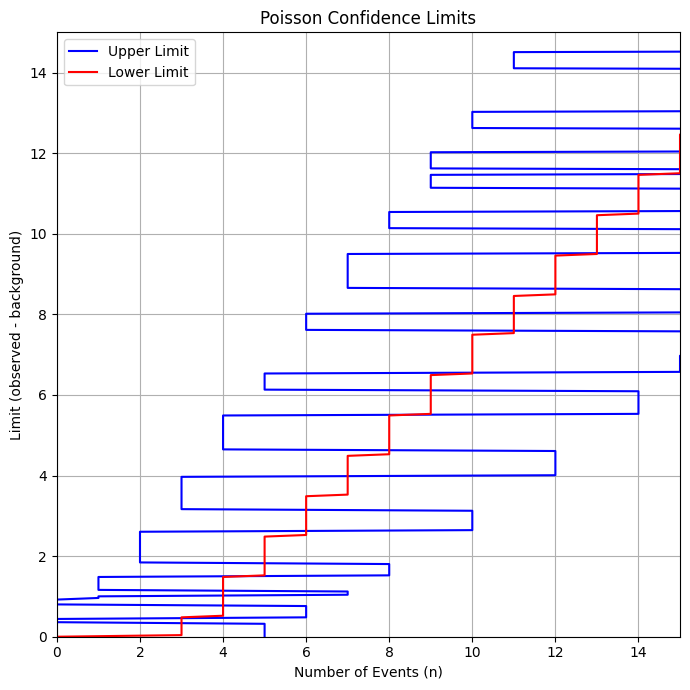

In [10]:
lm_list = []
hm_list = []# significance level for upper limit

# mu_true = np.arange(0, 15, 1.0)  # True values of mu for plotting
mu_true = np.linspace(0, 20, 500)

# Loop and compute
for mu in mu_true:
    lm, hm = get_range(mu)
    lm_list.append(lm)
    hm_list.append(hm)

# Plotting
plt.figure(figsize=(7, 7))
plt.plot(lm_list, mu_true, label='Upper Limit', color='blue')
plt.plot(hm_list, mu_true, label='Lower Limit', color='red')
plt.xlabel('Number of Events (n)')
plt.ylabel('Limit (observed - background)')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title('Poisson Confidence Limits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    

In [22]:
import pandas as pd

# Define the table columns
n = list(range(12))
UL = ['✓'] * 12
central = ['✓' if i in [0, 1, 2, 3, 4, 8] else '' for i in range(12)]

# Create DataFrame
df = pd.DataFrame({
    'n': n,
    'P(n|μ)': P_1_list.round(3),
    'μ_best': mu_best_list,
    'P(n|μ_best)': P_2_list.round(3),
    'R': Profile_likelihood_ratio_rounded,
    'rank': Rank_full,
    'U.L.': UL,
    'central': central
})

# Display the table
print(df.to_string(index=False))


 n  P(n|μ)  μ_best  P(n|μ_best)     R rank U.L. central
 0   0.030     0.0        0.050 0.607    6    ✓       ✓
 1   0.106     0.0        0.149 0.708    5    ✓       ✓
 2   0.185     0.0        0.224 0.826    3    ✓       ✓
 3   0.216     0.0        0.224 0.963    2    ✓       ✓
 4   0.189     1.0        0.195 0.966    1    ✓       ✓
 5   0.132     2.0        0.175 0.753    4    ✓        
 6   0.077     3.0        0.161 0.480         ✓        
 7   0.039     4.0        0.149 0.259         ✓        
 8   0.017     5.0        0.140 0.121         ✓       ✓
 9   0.007     6.0        0.132 0.050         ✓        
10   0.002     7.0        0.125 0.018         ✓        
11   0.001     8.0        0.119 0.006         ✓        
